In [1]:
#Gerekli paketler yükleniyor...
#ImageNet veriseti ile eğitilmiş model ve ağırlıkları yükleniyor...


from keras.applications import ResNet50
from keras.preprocessing.image import img_to_array
from keras.applications import imagenet_utils
from PIL import Image
import numpy as np
from io import BytesIO
import os
import requests

In [2]:
model = ResNet50(weights="imagenet")

102973440/102967424 [==============================] - 1s 0us/step


In [3]:
#Resmi girişe uygun formata getirmek için yeniden boyutlandırma fonksiyonu tanımlanıyor

def prepare_image(image, target):
	# giriş görüntüsünü yeniden boyutlandırma ve ön işlemerin yapılması
	image = image.resize(target)
	image = img_to_array(image)
	image = np.expand_dims(image, axis=0)
	image = imagenet_utils.preprocess_input(image)

	# işlenmiş görüntüyü alma
	return image

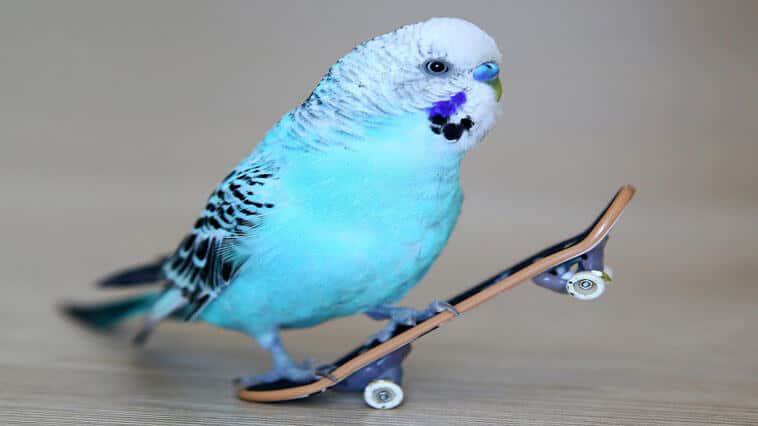

In [5]:
#Girilen web adresinden resim indiriliyor
ImageURL = "https://ajanimo.com/wp-content/uploads/2019/02/muhabbetkusuhakkinda.jpg"
response = requests.get(ImageURL)
image = Image.open(BytesIO(response.content))
image

In [ ]:
#Eğer Dosyadan Resim Okumak isterseniz
# root = 'drive/My Drive/'
# image_path = root+ 'Olips.png'
# image = Image.open(image_path)
# image = image.resize((224, 224))
# image
# Görüntüyü diziye çevir
# x = np.asarray(image, dtype='float32')
# Dizi listesine çevir
# x = np.expand_dims(x, axis=0)
# Giriş görüntüsünü eğitim setine uygun şekilde ön işlemleri yap 
# x = preprocess_input(x)
#preds = model.predict(x)
#print('Predicted:', decode_predictions(preds, top=3)[0])
#print(decode_predictions(preds, top=1)[0][0][1])

In [7]:
#Eğitilmiş model ile sınıflandırma yapılıyor.
data = {"success": False}

pre_image = prepare_image(image, target=(224, 224)) # 224 x 224 boyutlu hale getir

preds = model.predict(pre_image) # Kesirim modeline ön işlemden geçmiş görüntüyü uygula

results = imagenet_utils.decode_predictions(preds) #kestirim
data["predictions"] = []


for (imagenetID, label, prob) in results[0]: # ImageNet veri kümseinden etiket, olasılık ve kestrim sonucunu al
  r = {"label": label, "probability": float(prob)}
  data["predictions"].append(r)
  
data["success"] = True

print(data)

{'success': True, 'predictions': [{'label': 'indigo_bunting', 'probability': 0.031343989074230194}, {'label': 'thimble', 'probability': 0.03096795082092285}, {'label': 'red-backed_sandpiper', 'probability': 0.029171627014875412}, {'label': 'jay', 'probability': 0.02508661150932312}, {'label': 'European_gallinule', 'probability': 0.021444551646709442}]}


In [8]:
print("Sınıflandırma tahmini en yüksek olan {0} oranıyla {1}'dır.".format(data["predictions"][0]["probability"],data["predictions"][0]["label"])) 
# En yüksek olasılıklı sonucu ekrana yazdır

Sınıflandırma tahmini en yüksek olan 0.031343989074230194 oranıyla indigo_bunting'dır.
